Vamos a probar con una red neuronal, a ver si sacamos mejores predicciones.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import tensorflow

In [3]:
df = pd.read_csv("../data/processed/df_pre_modelo.csv", index_col=0)
df

,make,model,price,fuel,year,kms,power,doors,shift,is_professional
1,11,154,6200,1,2017.0,50071,82.0,5,0,1
2,23,769,7851,0,2016.0,103000,100.0,5,0,1
3,70,200,19426,0,2014.0,120000,140.0,5,0,1
4,23,768,22850,0,2017.0,107000,130.0,3,0,1
5,52,33,11490,1,2016.0,78665,130.0,5,0,1
...,...,...,...,...,...,...,...,...,...,...
49995,27,869,18490,1,2018.0,47000,140.0,5,1,1
49996,56,463,14500,0,2015.0,68750,150.0,3,0,1
49997,52,5,11000,1,2019.0,21422,72.0,5,0,1
49998,4,625,47900,1,2013.0,47900,450.0,5,1,1


In [51]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

X = df.drop(columns=["price"], axis=1)
y = df["price"]

scaler = pickle.load(open("../utils/scaler.pkl", 'rb'))

X = scaler.transform(X)
y = np.log(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(33083, 9)
(8271, 9)
(33083,)
(8271,)


c:\Users\APint\anaconda3\envs\deep_learning_env\lib\site-packages\sklearn\base.py:348: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation

model = Sequential()

model.add(Dense(128, activation="relu", input_shape=(9,)))
model.add(Dropout(0.3))

model.add(Dense(256, activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(256, activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(1))
model.add(Dropout(0.3))

In [53]:
from tensorflow.keras.optimizers import Adam

# opt = Adam(learning_rate=0.001)

In [54]:
model.compile(metrics=["mean_squared_error"], optimizer="adam", loss="mean_squared_error")

In [55]:
history = model.fit(X_train, y_train, epochs=20, validation_split=0.2, batch_size = 32)

Epoch 1/20


828/828 [==============================] - 3s 3ms/step - loss: 27.9225 - mean_squared_error: 27.9225 - val_loss: 12.6608 - val_mean_squared_error: 12.6608
Epoch 2/20
828/828 [==============================] - 2s 2ms/step - loss: 26.8570 - mean_squared_error: 26.8570 - val_loss: 14.3580 - val_mean_squared_error: 14.3580
Epoch 3/20
828/828 [==============================] - 2s 3ms/step - loss: 27.2327 - mean_squared_error: 27.2327 - val_loss: 9.0412 - val_mean_squared_error: 9.0412
Epoch 4/20
828/828 [==============================] - 2s 2ms/step - loss: 27.0953 - mean_squared_error: 27.0953 - val_loss: 7.8680 - val_mean_squared_error: 7.8680
Epoch 5/20
828/828 [==============================] - 2s 3ms/step - loss: 27.5022 - mean_squared_error: 27.5022 - val_loss: 9.8416 - val_mean_squared_error: 9.8416
Epoch 6/20
828/828 [==============================] - 2s 2ms/step - loss: 27.2247 - mean_squared_error: 27.2247 - val_loss: 7.9665 - val_mean_squared_error: 7.9665
Epoch 7/20
828/828 [===

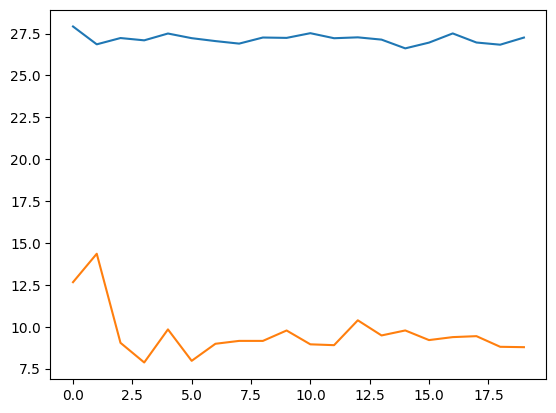

In [56]:
plt.figure()

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

plt.show()

Parece que no consigue entrenar bien.

In [57]:
y_pred = model.predict(X_test)

print(f"MSE: {metrics.mean_squared_error(y_test, y_pred)}")
print(f"RMSE: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}")
print(f"MAE: {metrics.mean_absolute_error(y_test, y_pred)}")
print(f"MAPE: {metrics.mean_absolute_percentage_error(y_test, y_pred)}")

print(f"r2 score: {metrics.r2_score(y_test, y_pred)}")
print(" ")

259/259 [==============================] - 0s 804us/step
MSE: 8.851786771034286
RMSE: 2.9751952492289115
MAE: 2.9430710278270653
MAPE: 0.31031934244205106
r2 score: -11.407007384030493
 


In [16]:
y_test

25929    10.038892
9282      9.017968
31576     9.441452
6324      9.648273
8703     10.065606
           ...    
3590      8.682708
6755     10.199882
3209      9.846917
17188     9.994242
22455     9.391828
Name: price, Length: 8271, dtype: float64

In [17]:
y_pred

array([[6.817053 ],
       [6.509714 ],
       [6.611205 ],
       ...,
       [6.9505243],
       [6.7345953],
       [6.3391266]], dtype=float32)